![](img/kaggle_submission.png)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

<a id="1"></a>
## Loading the Data Set
* In this part we load and visualize the data.

In [5]:
# read train 
train = pd.read_csv("../input/digit-recognition/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# read test 
test= pd.read_csv("../input/digit-recognition/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

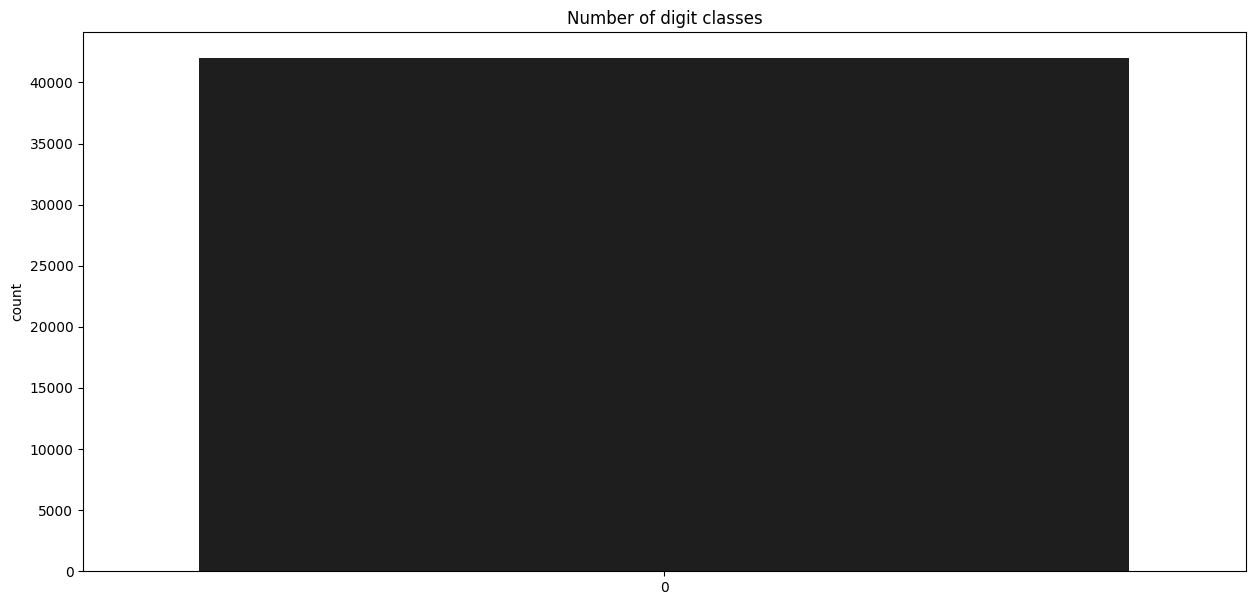

In [10]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

In [13]:
print(type(X_train.iloc[0]))

<class 'pandas.core.series.Series'>


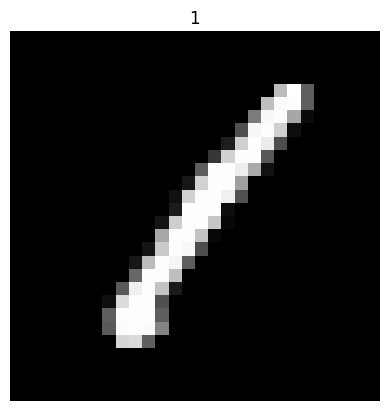

In [15]:
# plot some samples
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

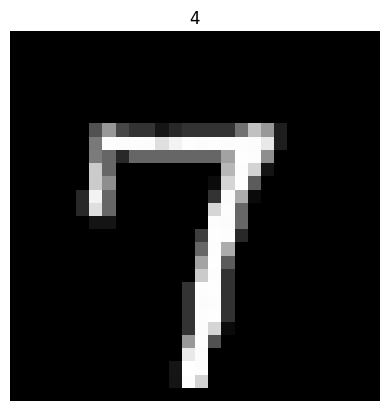

In [16]:
# plot some samples
img = X_train.iloc[6].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

<a id="2"></a>
## Normalization, Reshape and Label Encoding 
* Normalization
    * We perform a grayscale normalization to reduce the effect of illumination's differences.
    * If we perform normalization, CNN works faster.
* Reshape
    * Train and test images (28 x 28) 
    * We reshape all data to 28x28x1 3D matrices.
    * Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel. 
* Label Encoding  
    * Encode labels to one hot vectors 
        * 2 => [0,0,1,0,0,0,0,0,0,0]
        * 4 => [0,0,0,0,1,0,0,0,0,0]

In [17]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [18]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [21]:
# Label Encoding 
from keras.utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

<a id="3"></a>
## Train Test Split
* We split the data into train and test sets.
* test size is 10%.
* train size is 90%.

In [23]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


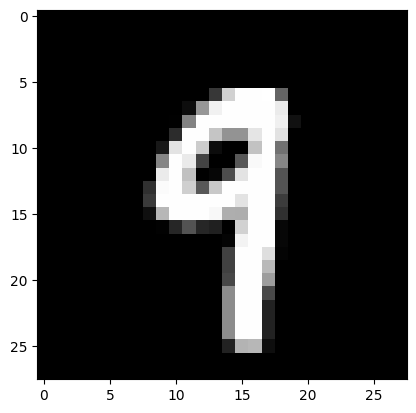

In [24]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
# activasion https://keras.io/api/layers/activations/

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='selu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(4,4)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='selu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = "tanh"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

<a id="12"></a>
### Define Optimizer   
* Adam optimizer: Change the learning rate

In [29]:
# Define the optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [30]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [52]:
epochs = 100
batch_size = 250

<a id="15"></a>
### Data Augmentation
* To avoid overfitting problem, we need to expand artificially our handwritten digit dataset
* Alter the training data with small transformations to reproduce the variations of digit.
* For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated.
* <a href="https://ibb.co/k24CUp"><img src="https://preview.ibb.co/nMxXUp/augment.jpg" alt="augment" border="0"></a>

In [53]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

<a id="16"></a>
### Fit the model

In [54]:
# Fit the model
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.8722 - loss: 0.4063 - val_accuracy: 0.9481 - val_loss: 0.1845
Epoch 2/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8400 - loss: 0.3372 - val_accuracy: 0.9514 - val_loss: 0.1770
Epoch 3/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.8764 - loss: 0.3859 - val_accuracy: 0.9600 - val_loss: 0.1394
Epoch 4/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8880 - loss: 0.3814 - val_accuracy: 0.9595 - val_loss: 0.1455
Epoch 5/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.8824 - loss: 0.3644 - val_accuracy: 0.9633 - val_loss: 0.1415
Epoch 6/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9280 - loss: 0.2646 - val_accuracy: 0.9629 - val_loss: 0.1432
Epoch 7/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.8877 - loss: 0.3547 - val_accuracy: 0.9648 - val_loss: 0.1348
Epoch 8/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8920 - loss: 0.3909 - 

<a id="17"></a>
### Evaluate the model
* Test Loss visualization
* Confusion matrix

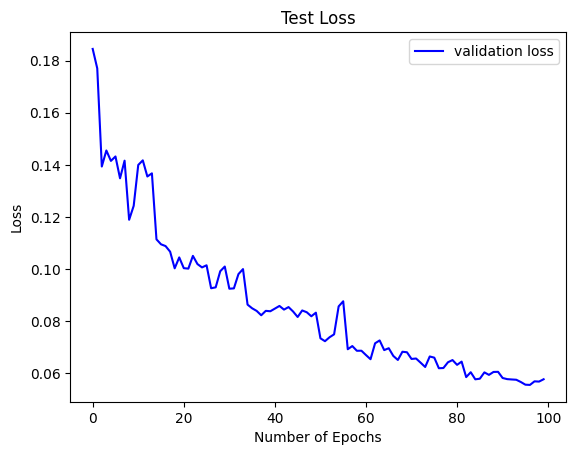

In [55]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [56]:
history.history['accuracy']

[0.8713642358779907,
 0.8399999737739563,
 0.8788015842437744,
 0.8880000114440918,
 0.8847403526306152,
 0.9279999732971191,
 0.8914247751235962,
 0.8920000195503235,
 0.893688440322876,
 0.871999979019165,
 0.897363543510437,
 0.8999999761581421,
 0.8981091976165771,
 0.8880000114440918,
 0.8992010354995728,
 0.9240000247955322,
 0.9027163982391357,
 0.8880000114440918,
 0.9039148092269897,
 0.9120000004768372,
 0.9086018800735474,
 0.9039999842643738,
 0.9078561663627625,
 0.8999999761581421,
 0.9106258153915405,
 0.9039999842643738,
 0.9102796316146851,
 0.8759999871253967,
 0.9130759239196777,
 0.8840000033378601,
 0.9166977405548096,
 0.9240000247955322,
 0.91478031873703,
 0.9079999923706055,
 0.9168042540550232,
 0.9319999814033508,
 0.9203994870185852,
 0.9160000085830688,
 0.9200000166893005,
 0.9279999732971191,
 0.9205326437950134,
 0.9240000247955322,
 0.9224234223365784,
 0.9160000085830688,
 0.9232756495475769,
 0.8840000033378601,
 0.9230892062187195,
 0.920000016689300

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


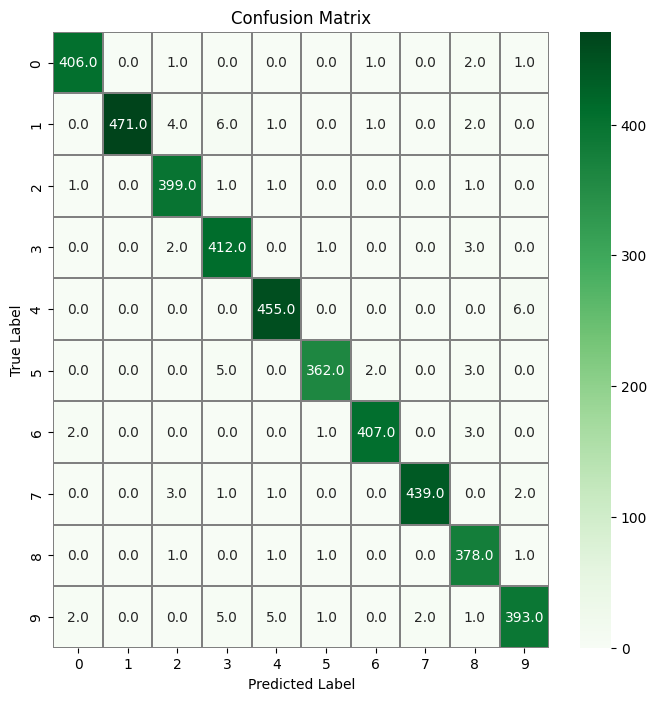

In [57]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

<a id="16"></a>
### Submission

In [58]:
predictions = model.predict(test, batch_size=128)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [59]:
predicted_labels = np.argmax(predictions, axis=1)

In [61]:
submission = pd.DataFrame({
    "ImageId": np.arange(1, len(predicted_labels) + 1),
    "Label": predicted_labels
})

submission.to_csv('submission100.csv', index=False)